# Pymaceuticals Inc.
---

### Analysis

There were medications that were tested on mice including the placebo to help with the treatment of tumors. From analysis, we can tell that drug Ramicane is more effective than Capomulin with difference. We can also say that the least effective drug to reduce tumors is Ketapril followed by placebo. Gender count shows as that we have almost even numbers of mice. 
 

In [1]:
%matplotlib inline

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_combine = pd.merge(study_results,mouse_metadata, how = 'left', on='Mouse ID')

# Display the data table for preview
mouse_study_combine.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [34]:
# Checking the number of mice.
mice=mouse_study_combine["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice


249

In [35]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_by_id = mouse_study_combine.loc[mouse_study_combine.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
dup_mice_by_id


array(['g989'], dtype=object)

In [36]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_by_id = mouse_study_combine[mouse_study_combine.duplicated(subset=["Mouse ID", "Timepoint"])]
dup_mice_by_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_combine[mouse_study_combine['Mouse ID'] !="g989"]
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [38]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count =clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice_count)
clean_number_of_mice


248

## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

reg_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
reg_mean

reg_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
reg_median

reg_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
reg_variance

reg_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
reg_std

reg_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
reg_sem

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume": reg_mean, "Median Tumor Volume":reg_median, "Tumor Volume Variance":reg_variance, "Tumor Volume Std Dev.": reg_std, "Tumor Volume Std. Err.": reg_sem})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
st_group_by = clean_df.groupby('Drug Regimen')

# Using the aggregation method, produce the same summary statistics in a single line.
clean_agg = clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
clean_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

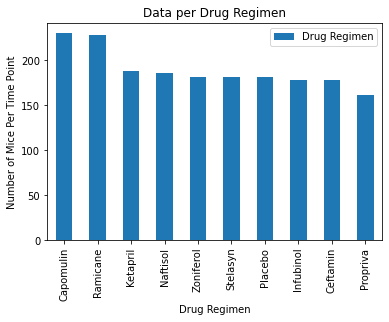

<Figure size 432x288 with 0 Axes>

In [41]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
each_drug = pd.DataFrame(pd.value_counts(mouse_study_combine["Drug Regimen"]))
each_drug
each_drug.plot(kind = "bar")
plt.title("Data per Drug Regimen")
plt.ylabel("Number of Mice Per Time Point")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()


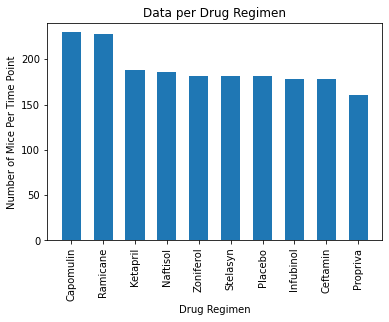

In [42]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mouse_study_combine["Drug Regimen"].value_counts().index
y_axis = mouse_study_combine["Drug Regimen"].value_counts()
plt.bar(x_axis,y_axis, width = .6)
plt.xticks(x_axis, rotation = 90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+10)
plt.ylabel("Number of Mice Per Time Point")
plt.xlabel("Drug Regimen")
plt.title("Data per Drug Regimen")
plt.show()

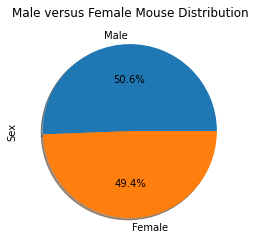

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = mouse_study_combine["Sex"].value_counts()
explode = [0, 0]
gender_count.plot(kind="pie", autopct="%1.1f%%", explode=explode, shadow=True)
plt.title("Male versus Female Mouse Distribution")
plt.savefig("../Images/gender_pandas.png")
plt.show()


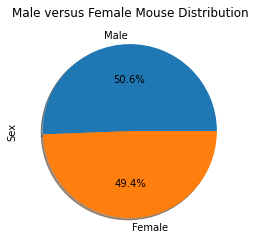

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["tab:blue", "tab:orange"]
explode = [0, 0]
genders = gender_count.index.values.tolist()
plt.pie(gender_count, explode=explode, labels=genders, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Male versus Female Mouse Distribution")
plt.ylabel('Sex',fontsize = 10)
plt.savefig("../Images/gender_pyplot.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_drug = mouse_study_combine.loc[mouse_study_combine["Drug Regimen"] == "Capomulin",:]
Ramicane_drug = mouse_study_combine.loc[mouse_study_combine["Drug Regimen"] == "Ramicane", :]
Infubinol_drug = mouse_study_combine.loc[mouse_study_combine["Drug Regimen"] == "Infubinol", :]
Ceftamin_drug = mouse_study_combine.loc[mouse_study_combine["Drug Regimen"] == "Ceftamin", :]


# Start by getting the last (greatest) timepoint for each mouse
greatest_time = mouse_study_combine.groupby(['Mouse ID'])['Timepoint'].max()
greatest_time


#last_time_df = merged_frames[["Mouse ID","Drug Regimen","Timepoint_x","Tumor Volume (mm3)"]]
#last_time_df 


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [46]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(greatest_time, mouse_study_combine, on=["Mouse ID", "Timepoint"], how="left")
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [47]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugs in treatments:
    

    # Locate the rows which contain mice on each drug and get the tumor volumes 
    tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drugs, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    

    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"For {drugs}, the outliers are: {outliers}")
    
    

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


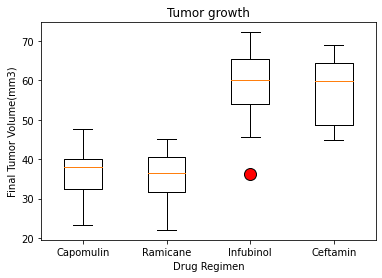

In [48]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(markerfacecolor='r', markersize=12,
                  linestyle='none')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor growth')
ax1.set_ylabel('Final Tumor Volume(mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_vol_data, flierprops = flierprops, labels = treatments)

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

In [49]:
capomulin_df = mouse_study_combine.loc[mouse_study_combine["Mouse ID"] == "l509",:]
capomulin_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


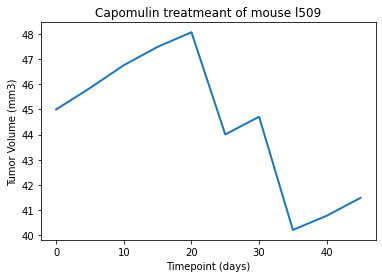

In [50]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = mouse_study_combine.loc[mouse_study_combine["Mouse ID"] == "l509",:]
capomulin_df

x_axisTP = capomulin_df["Timepoint"]
tumsiz = capomulin_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

In [51]:
capomulin = mouse_study_combine.loc[mouse_study_combine["Drug Regimen"]== "Capomulin"]
capomulin["Mouse ID"].unique()

array(['b128', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'], dtype=object)

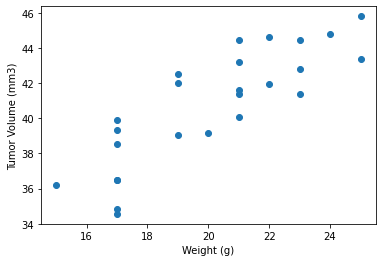

In [56]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_group = capomulin.groupby('Mouse ID')
x_values = mouse_group['Weight (g)'].mean()
y_values = mouse_group['Tumor Volume (mm3)'].mean()
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')


plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


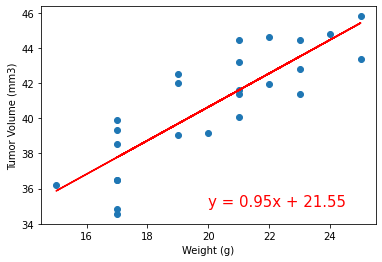

In [54]:
# Calculate the correlation coefficient and linear regression model 
mouse_group = capomulin.groupby('Mouse ID')
x_values = mouse_group['Weight (g)'].mean()
y_values = mouse_group['Tumor Volume (mm3)'].mean()

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# creating equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting
plt.scatter(x_values,y_values) #Scatterplot
plt.plot(x_values,regress_values,"r-") #regression
plt.annotate(line_eq,(20,35),fontsize=15,color="red") #printing equation
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

#Correlation
print(f"The correlation between mouse weight and the average tumor volume is {'{:,.2f}'.format(rvalue)}")

plt.savefig('linearregression')
plt.show()